In [2]:
from IPython.display import Image, display

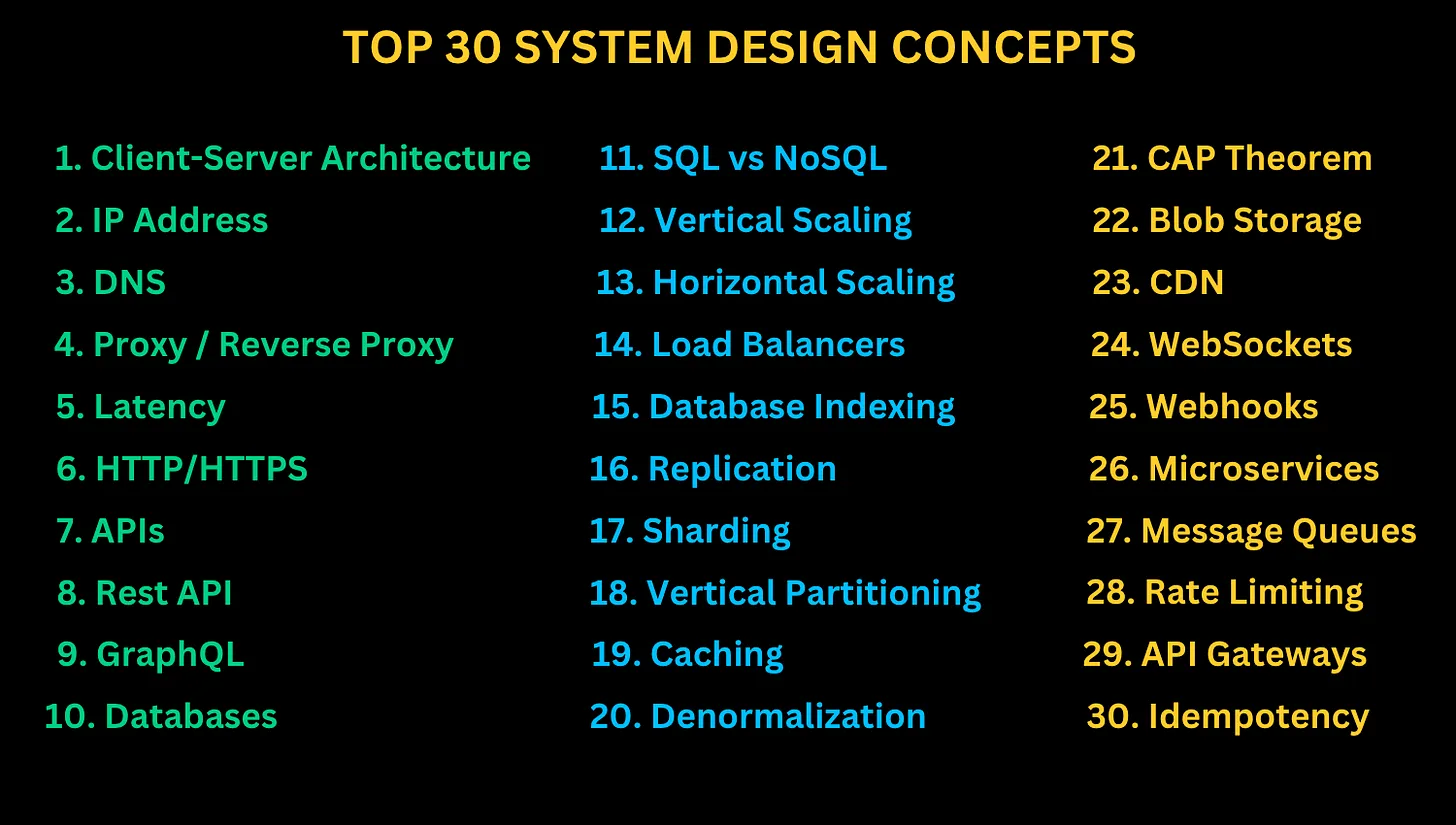

In [3]:
display(Image(filename='Utils/1.webp'))

## 1. Client-Server Architecture

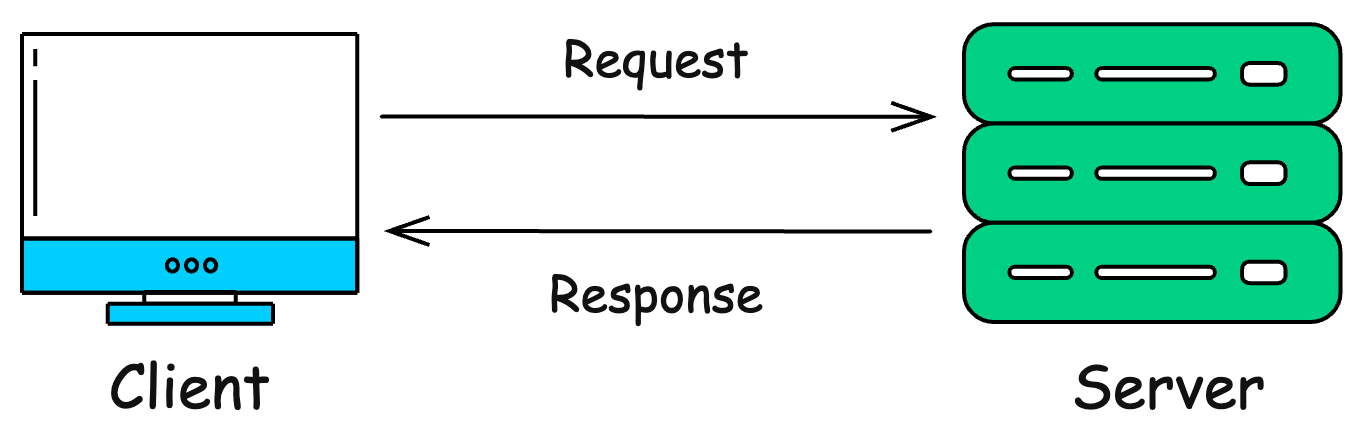

In [4]:
display(Image(filename='Utils/2.png'))

1. Client : 

    1. This could be any frontend application , web browser , any mobile app. 
    2. The client sends a request to store, retrieve, or modify data

2. Server : 

    1. A machine that runs continously and waiting to handle incoming requests.
    2. The server recieves the request , process it and performs the necessary operations
       and return the response.
    
But question ? arise , 

" How does the client even know where to find the server is ??? "

## 2. IP Address

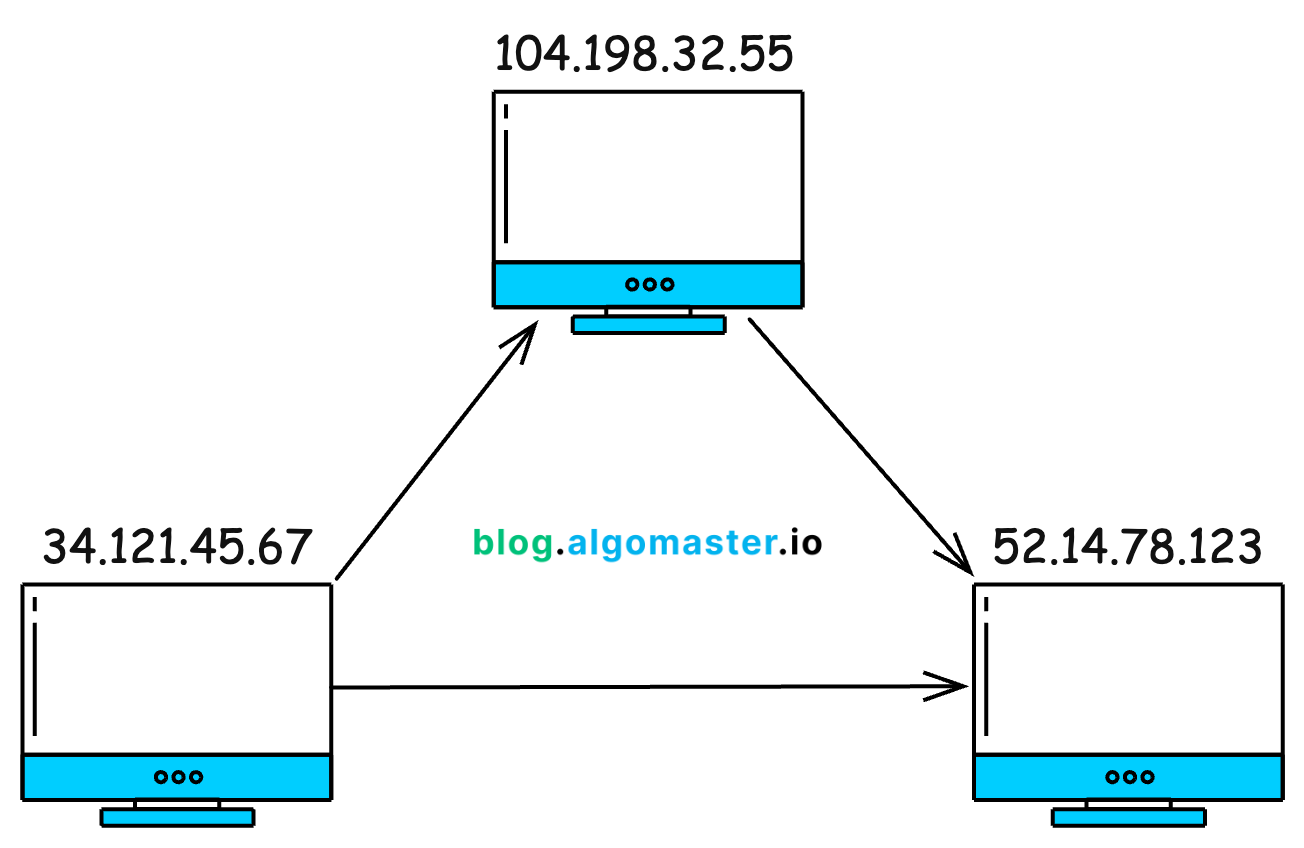

In [5]:
display(Image(filename='Utils/3.png'))

1. On the internet , computers identify each other using IP address.

2. A client does not magically knows where a server is , it needs an address to locate and 
   identify it and there IP address come into picture which acts like phone number for servers.

3. Every deployed server has an unique IP address , when a client want to interact with the service , it just send request it to correct IP address.

But there's a problem (: 
 
1. We can't expect users (or even systems) to remeber a string of random numbers , for every service they connect to.

2. Also on when we visit a website we type its name not IP address .

3. Let say you want to use a service and now recently the service migrates  to another server and there is a possibility that its IP address may be change which can lead to breaking all connections.







## 3. DNS 

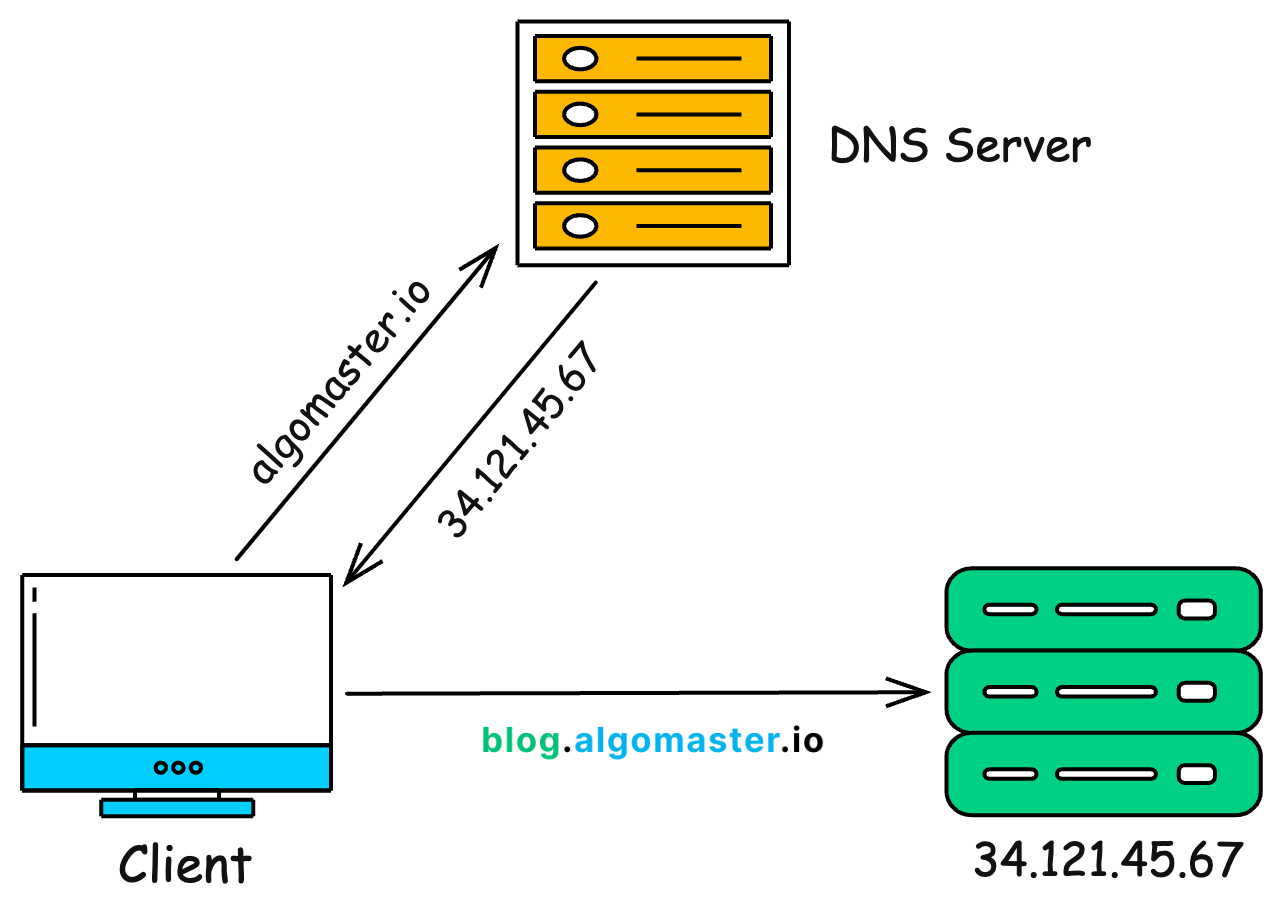

In [6]:
display(Image(filename='Utils/4.png'))

1. Instead of relying on remember IP address , we use something human friendly : domain names, But we need a way to map domain name's to its corresponding IP address.

2. This where DNS (Domain Name server) comes in picture.It maps easy to remember domain names (like google.com) to their corresponding IP addresses.

3. What's happens behind the scenes .
  
   1. When you type google.com in your browser , your computer ask DNS server for corresponding IP address . (Just check it out by type "ping google.com") in your terminal.

   2. Once the DNS server responds with the IP, your browser uses it to establish a connection with the server and make a request.



## 4. Proxy / Reverse Proxy

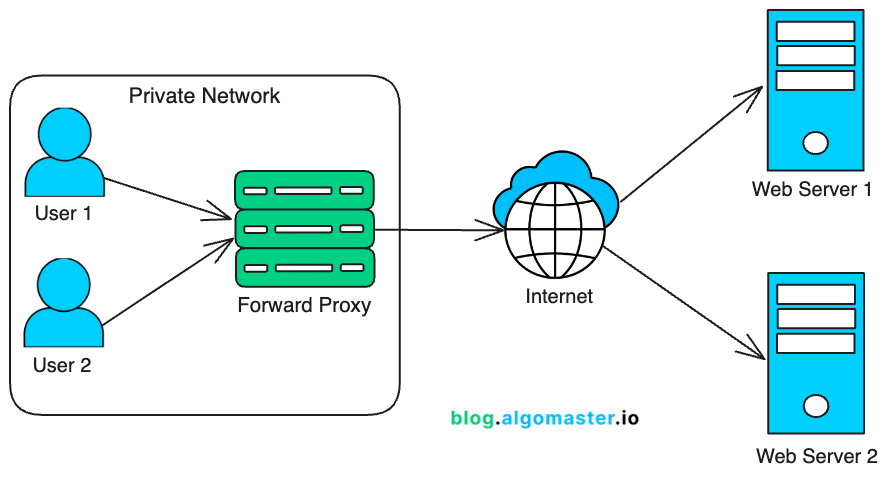

In [7]:
display(Image(filename='Utils/5.png'))

When you visit a website, your request doesn’t always go directly to the server—sometimes, it passes through a proxy or reverse proxy first.

1. A proxy server acts as a middleman between your device and the internet.

2. When you request a webpage, the proxy forwards your request to the target server, retrieves the response, and sends it back to you.

Why Proxy ??

1. Proxy hides your IP address, keeping your location and identity private.


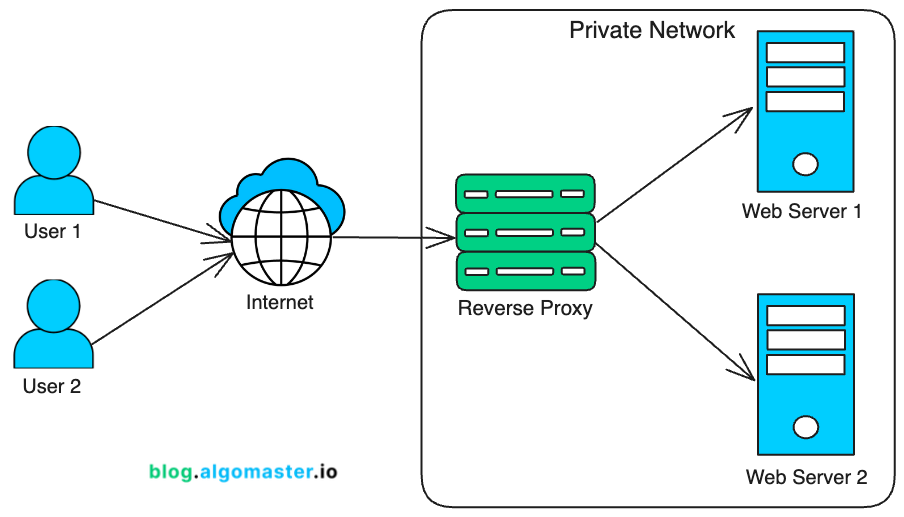

In [8]:
display(Image(filename='Utils/6.png'))

1. A reverse proxy works the other way around.It intercepts client requests and forwards them to backend servers based on predefined rule.

2. It can also act as a load balancer, distributing traffic across multiple servers.

Why Reverse Proxy ?? 

1. Allowing direct access to servers can pose security risks, exposing them to threats like hackers and DDoS attacks.

2. A reverse proxy mitigates these risks by acting as a controlled entry point that regulates incoming traffic and hides server IPs.


## 5. Latency 

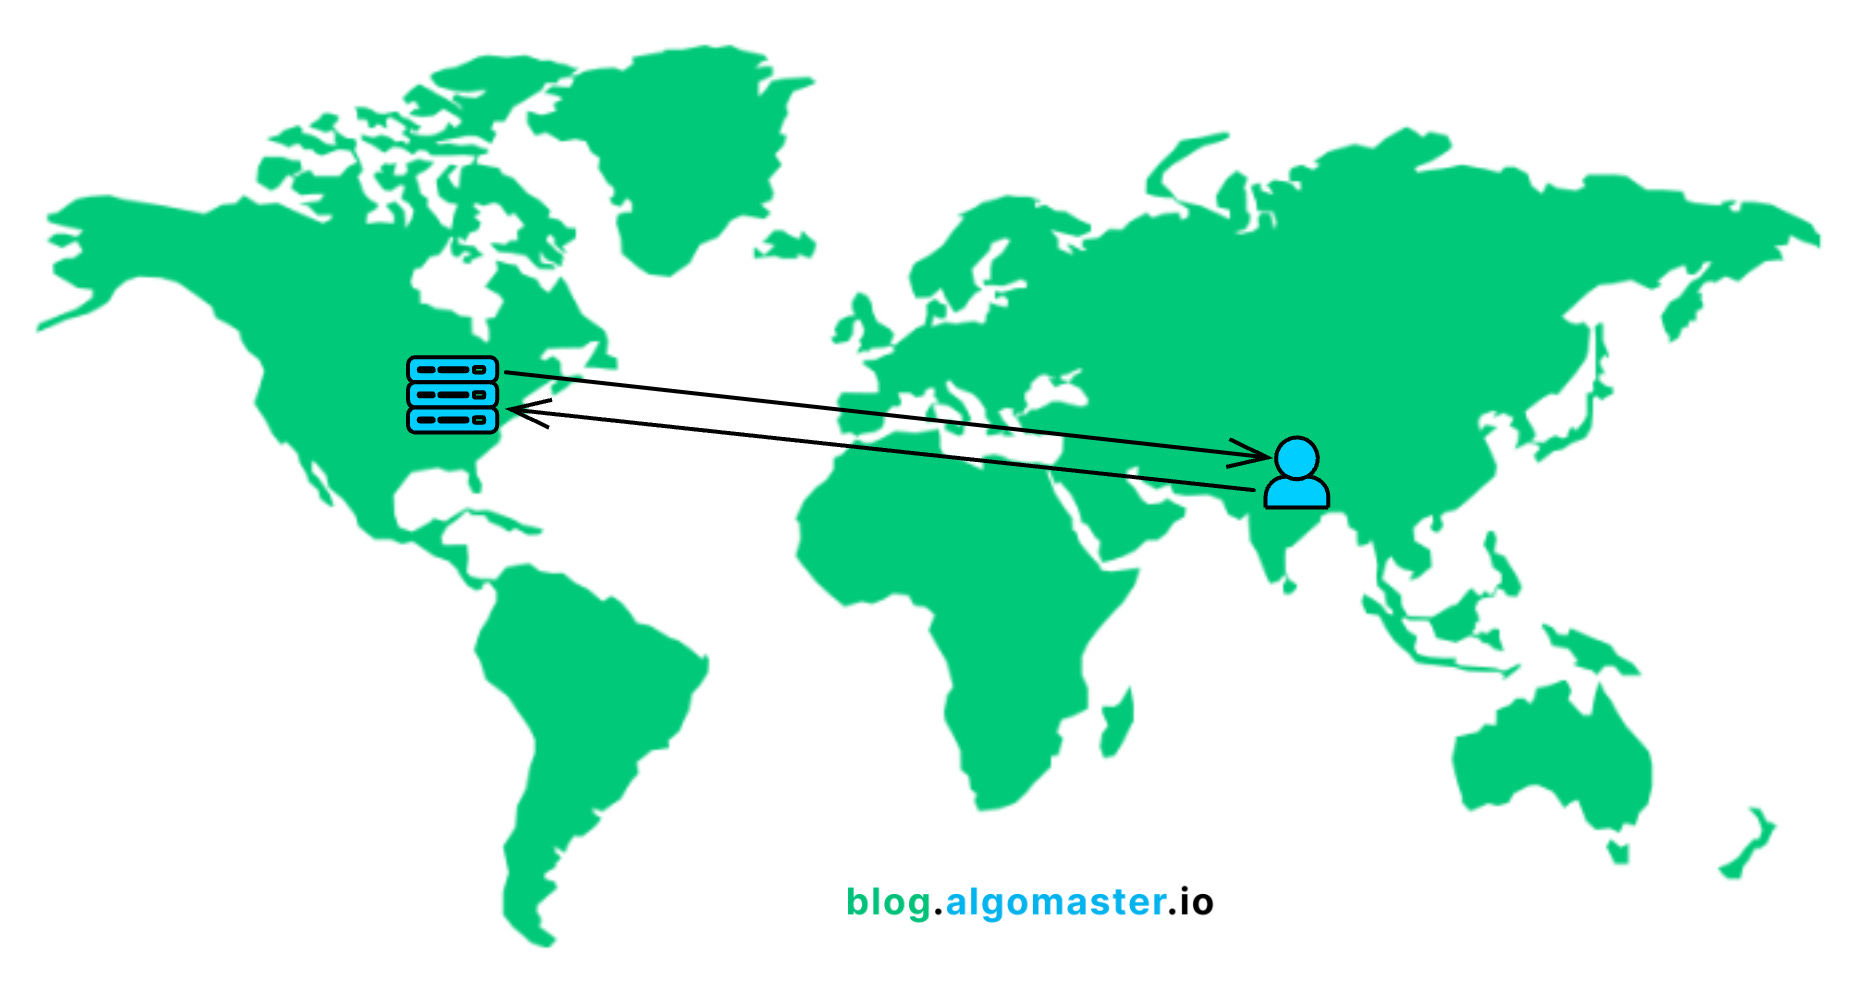

In [10]:
display(Image(filename='Utils/7.jpg'))

1. Whenever a client communicates with a server, there’s always some delay. One of the biggest causes of this delay is physical distance.

2. For example, if our server is in New York, but a user in India sends a request, the data has to travel halfway across the world and then the response has to make the same long trip back. This round-trip delay is called latency.

3. Latency : The total time it takes for data to travel between the client and the server. 

4. High latency can make applications feel slow and unresponsive.

5. One way to reduce latency is by deploying our service across multiple data centers worldwide. This way, users can connect to the nearest server instead of waiting for data to travel across the globe.


But the Question ?? arises

Once the connection is made , How do client and servers actually communicate ??


## 6. HTTP/HTTPS

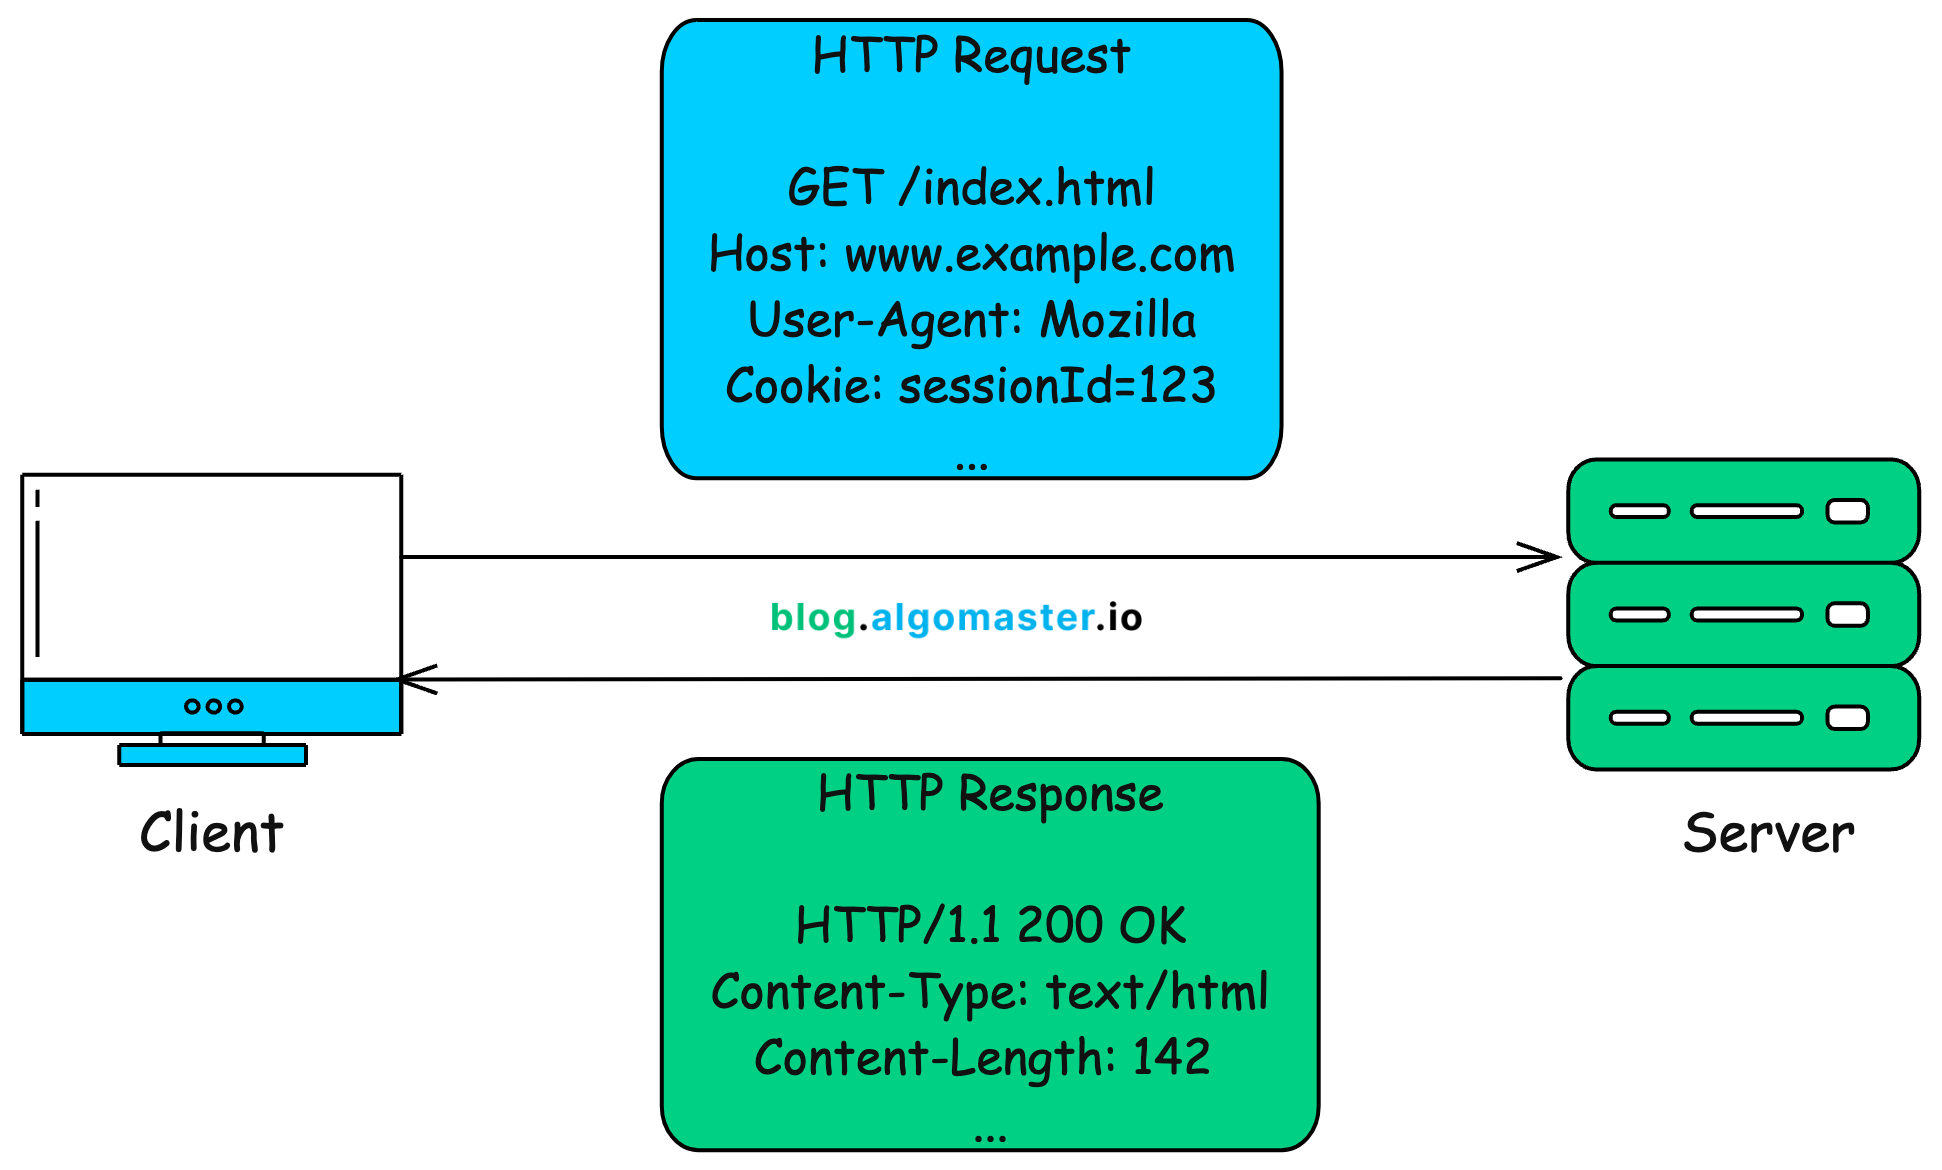

In [11]:
display(Image(filename='Utils/7.png'))

1. Every time you visit a website, your browser and the server communicate using a set of rules called HTTP (Hypertext Transfer Protocol). That’s why most URLs start with http:// or its secure version, https://.

How it works : 

1. The client sends a request to the server. This request includes a header (containing details like the request type, browser type, and cookies) and sometimes a request body (which carries additional data, like form inputs).

2. The server processes the request and responds with an HTTP response—either returning the requested data or an error message if something goes wrong.

But HTTP has a major flaw , it sends data in plainm text and this is a serious problem, especially for sensitive information like passwords, credit card details, and personal data.

That's why modern websites use HTTPS (Hypertext Transfer Protocol Secure) instead.

1.  HTTPS encrypts all data using SSL/TLS, ensuring that even if someone intercepts the request, they can’t read or alter it.

But But ....

1. Clients and servers don’t directly exchange raw HTTP requests and response.

2. HTTP is just a protocol for transferring data but it doesn’t define:

    1. How requests should be structured
    2. What format responses should be in
    3. how different clients should interact with the server.

For that APIs (or Application Programming Interfaces) come in.


# 7. APIs


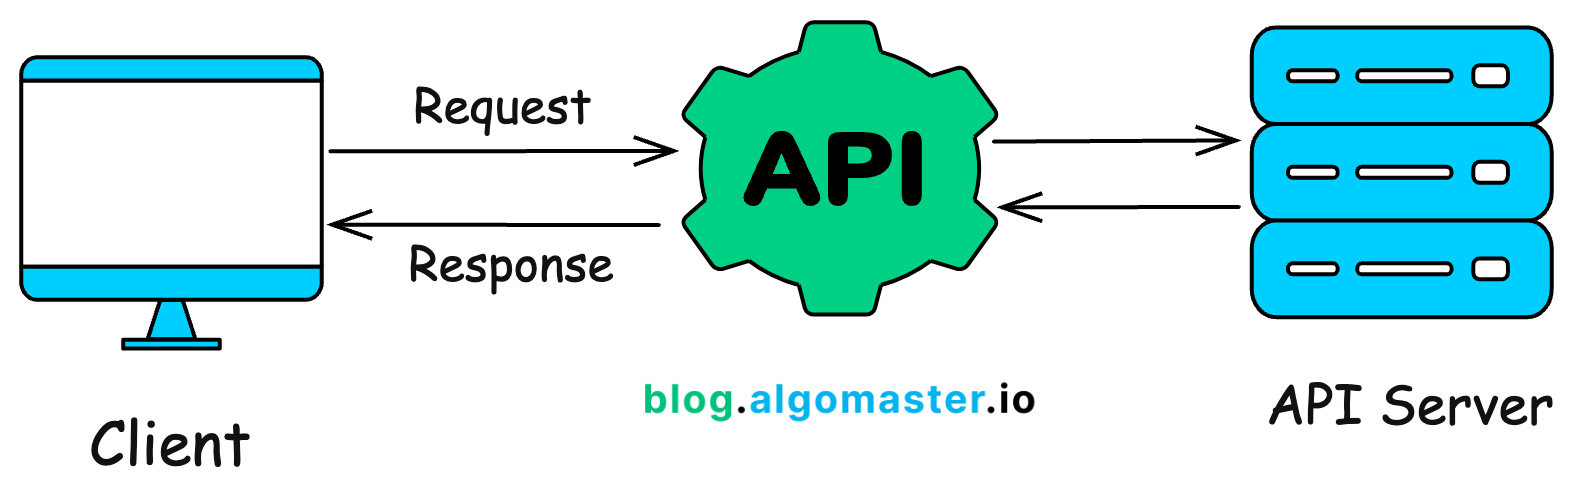

In [12]:
display(Image(filename='Utils/8.png'))

1. API act as a middleman that allows clients (like web and mobile apps) to communicate with servers without worrying about low-level details.

2. Almost every digital service you use—social media, e-commerce, online banking, ride-hailing apps—is built on APIs working together behind the scenes.

3. APIs provide a layer of abstraction—the client doesn’t need to know how the server processes the request, only that it returns the expected data.Example : 
you just call an api endpoint like this , GET https://weatherapp.com/api/weather?city=Delhi




How it works : 

1. A client sends a request to an API.

  ``` 
      GET /api/weather?city=Delhi HTTP/1.1
      Host: weatherapp.com
      User-Agent: Chrome
      Accept: application/json
  ```

 2. The API, hosted on a server, processes the request, interacts with databases or other services, and prepares a response.

  ```
     @app.get("/api/weather")
      def get_weather(city: str):
            # This is the API logic
            weather = {"city": city, "temperature": 30, "condition": "Sunny"}
            return weather
   ```

 3. The API sends back the response in a structured format, usually JSON or XML, which the client understands and can display.

   ```
      HTTP/1.1 200 OK
      Content-Type: application/json
   ```

      Json :

            ```
            {
                  "city": "Delhi",
                  "temperature": 30,
                   "condition": "Sunny"
             }

            ```


But But ...

1. Not all APIs are built the same.

2. Different API styles exist to serve different needs. Two of the most popular ones are REST and GraphQL.

# 8. RestAPI

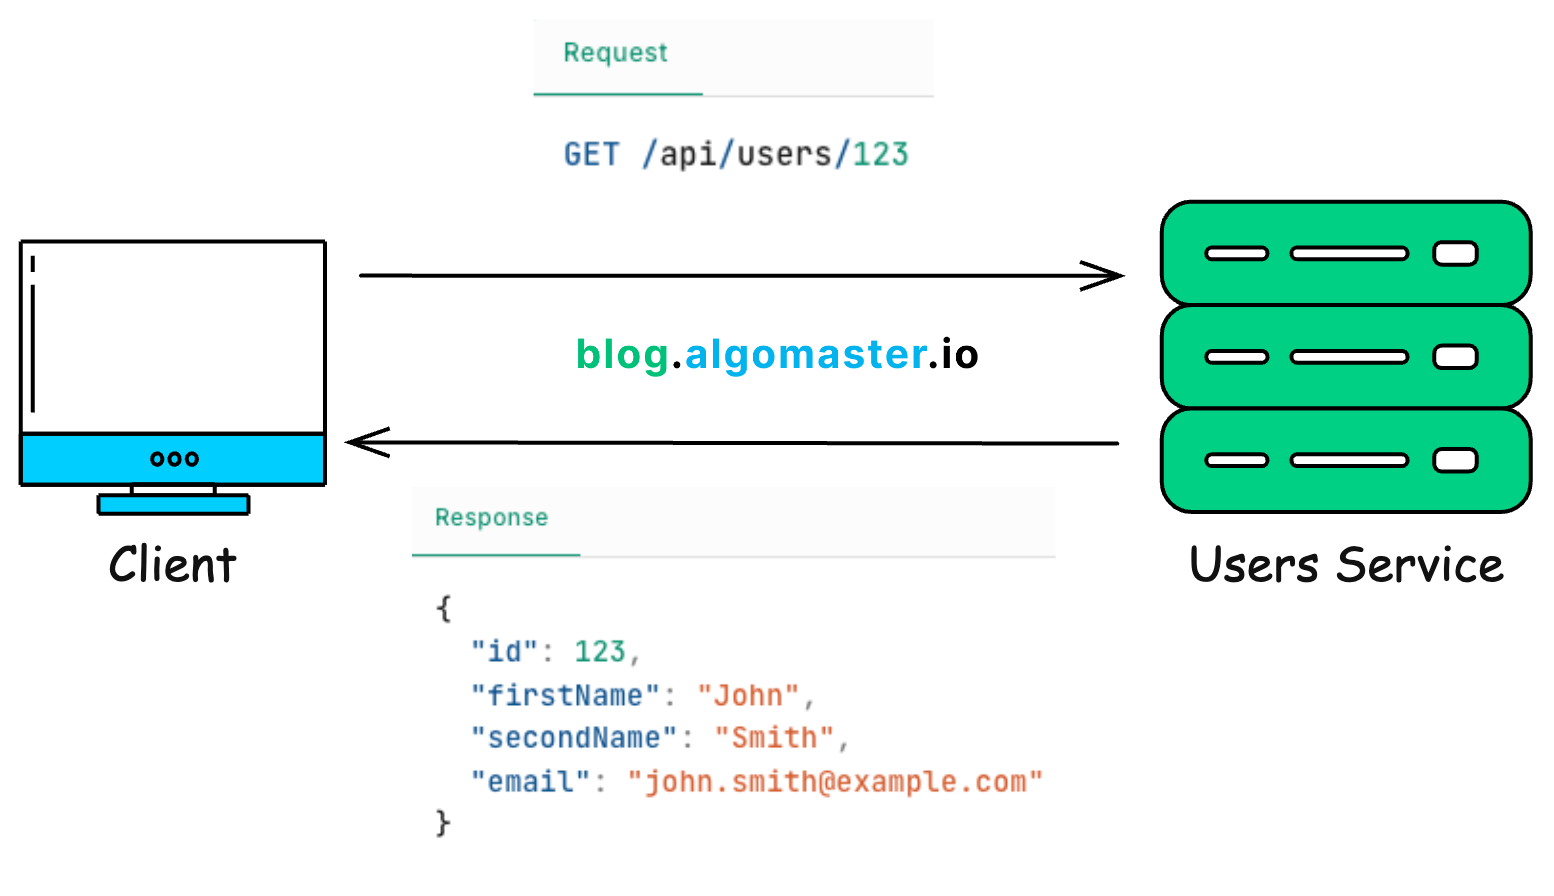

In [13]:
display(Image(filename='Utils/9.png'))

1. A REST (Representational State Transfer) API follows a set of rules that define how clients and servers communicate over HTTP in a structured way.

2. Key things about Rest : 

  1. Stateless: Every request is independent; the server doesn’t store client state.

  2. Resource-Based: Everything is treated as a resource (e.g., /users, /orders, /products).

  3. Uses Standard HTTP Methods: Clients interact with resources using HTTP methods like:
    
    1. GET → Retrieves data (e.g., fetching a user profile).
    2. POST → Creates new data (e.g., adding a new user).
    3. PUT/PATCH → Updates existing data (e.g., changing user settings).
    4. DELETE → Removes data (e.g., deleting an account).

3. REST APIs are great because they’re simple, scalable, and easy to cache.

But But ... they have limitations, especially when dealing with complex data retrieval.

1. REST endpoints often return more data than needed, leading to inefficient network usage.

2. If an API doesn’t return related data, the client may need to make multiple requests to retrieve all required information.

To address these challenges, GraphQL was introduced in 2015 by Facebook.

# 9. GraphQL

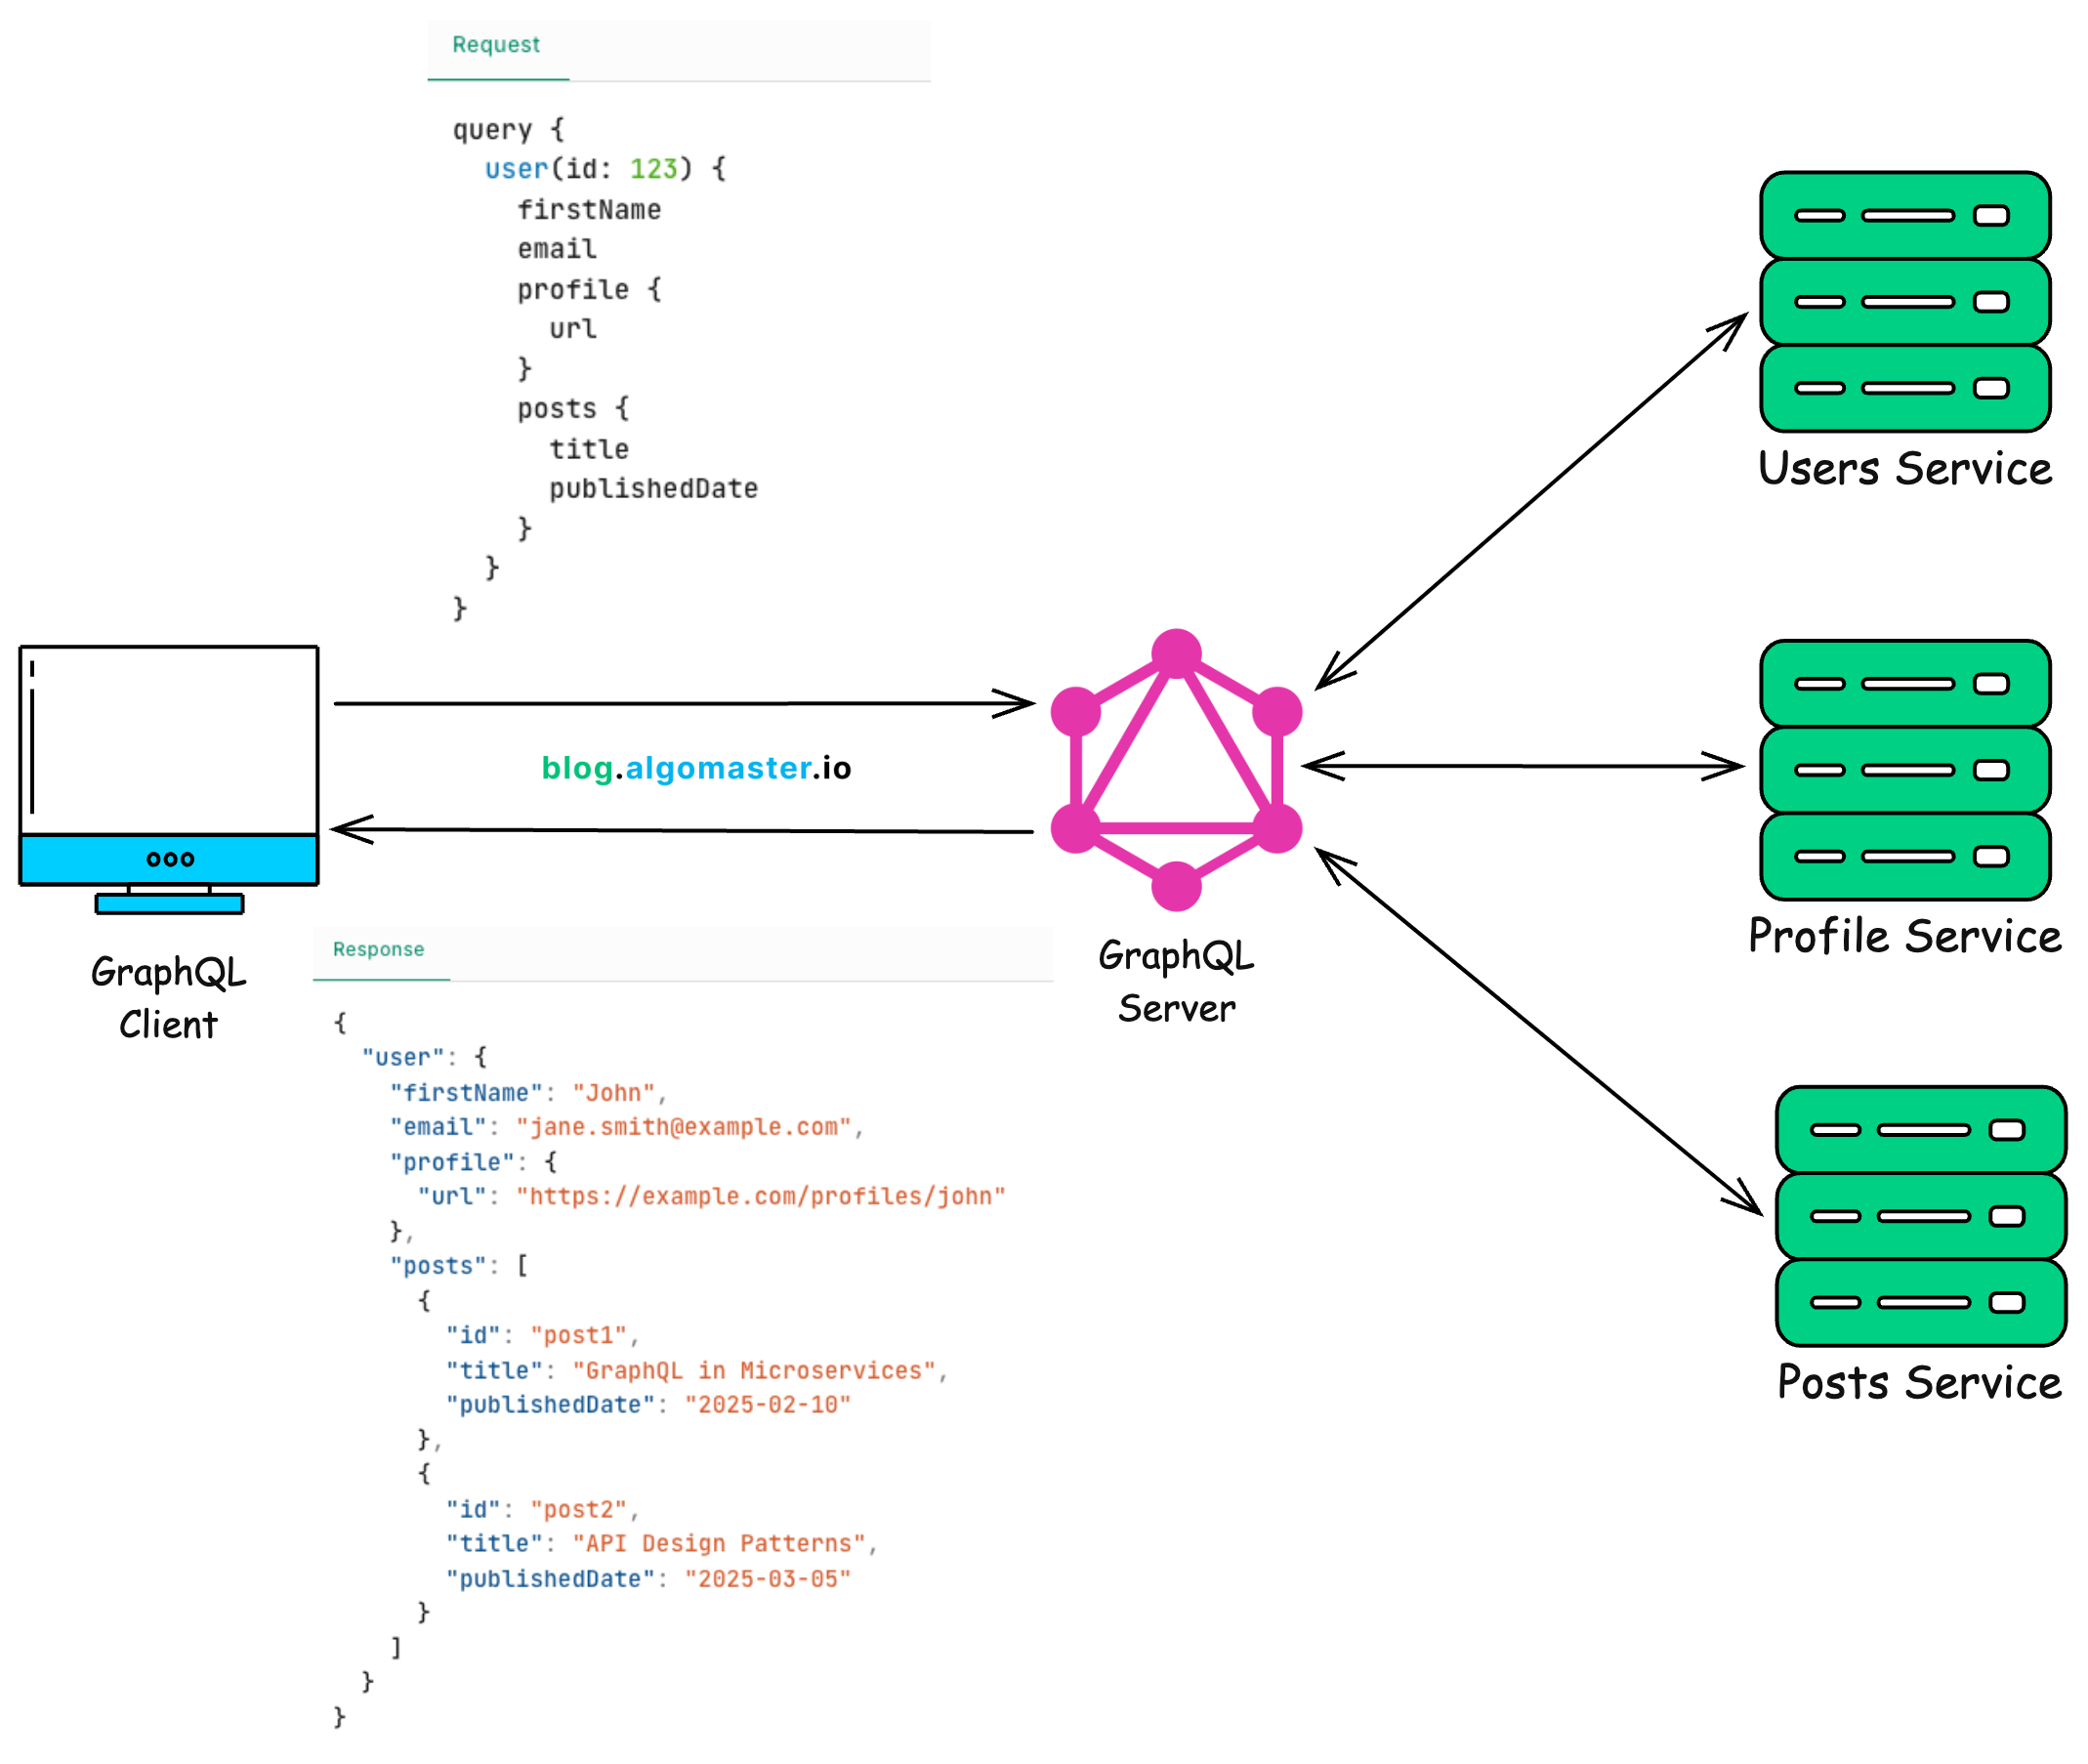

In [14]:
display(Image(filename='Utils/10.png'))

1. With a REST API, if you need a user details, user profile details along with their recent posts, you might have to make multiple requests to different endpoints:

    1. GET /api/users/123 → fetch user details

    2. GET /api/users/123/profile → fetch user profile
    
    3. GET /api/users/123/posts → fetch user’s posts

2. With GraphQL, you can combine those requests into one and fetch exactly the data you need in a single query as shown in diagram.

3. Also the server responds with only the requested fields, reducing unnecessary data transfer and improving efficiency.


But ...

1. GraphQL also comes with trade-offs—it requires more processing on the server side and isn’t as easy to cache as REST.


When a client makes a request, they usually want to store or retrieve data.

But question ?? arises , where is the actual data stored?


# 10. DataBases 

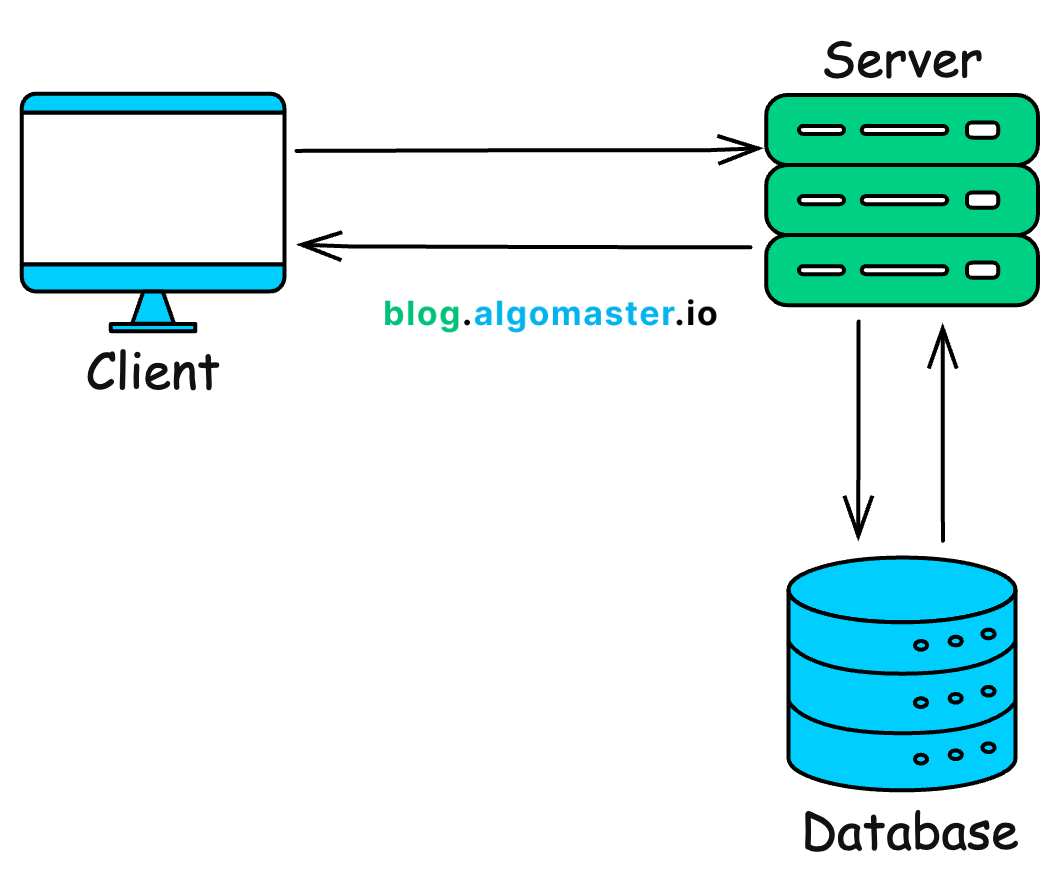

In [17]:
display(Image(filename='Utils/11.png'))

1. If our application deals with small amout of data , we could store it in memory.

2. But modern applications deals with small amount of data , far more than that which memory can efficiently handle.

3. That's why we need a dedicated server for smooth handling and managing data.

4. A database is the backbone of any server , It ensures that data is stored , recieved , 
and managed efficiently while keeping it secure , **consistent and durable**.

5. When a client requests to store or recieve the data , the server communicated with database , fetches the reqd information and return it to client.

6. Different applications have different **scalability, performance, and consistency** requirements, which is choosing the right type of database is important.



# 11. SQL and NoSQL

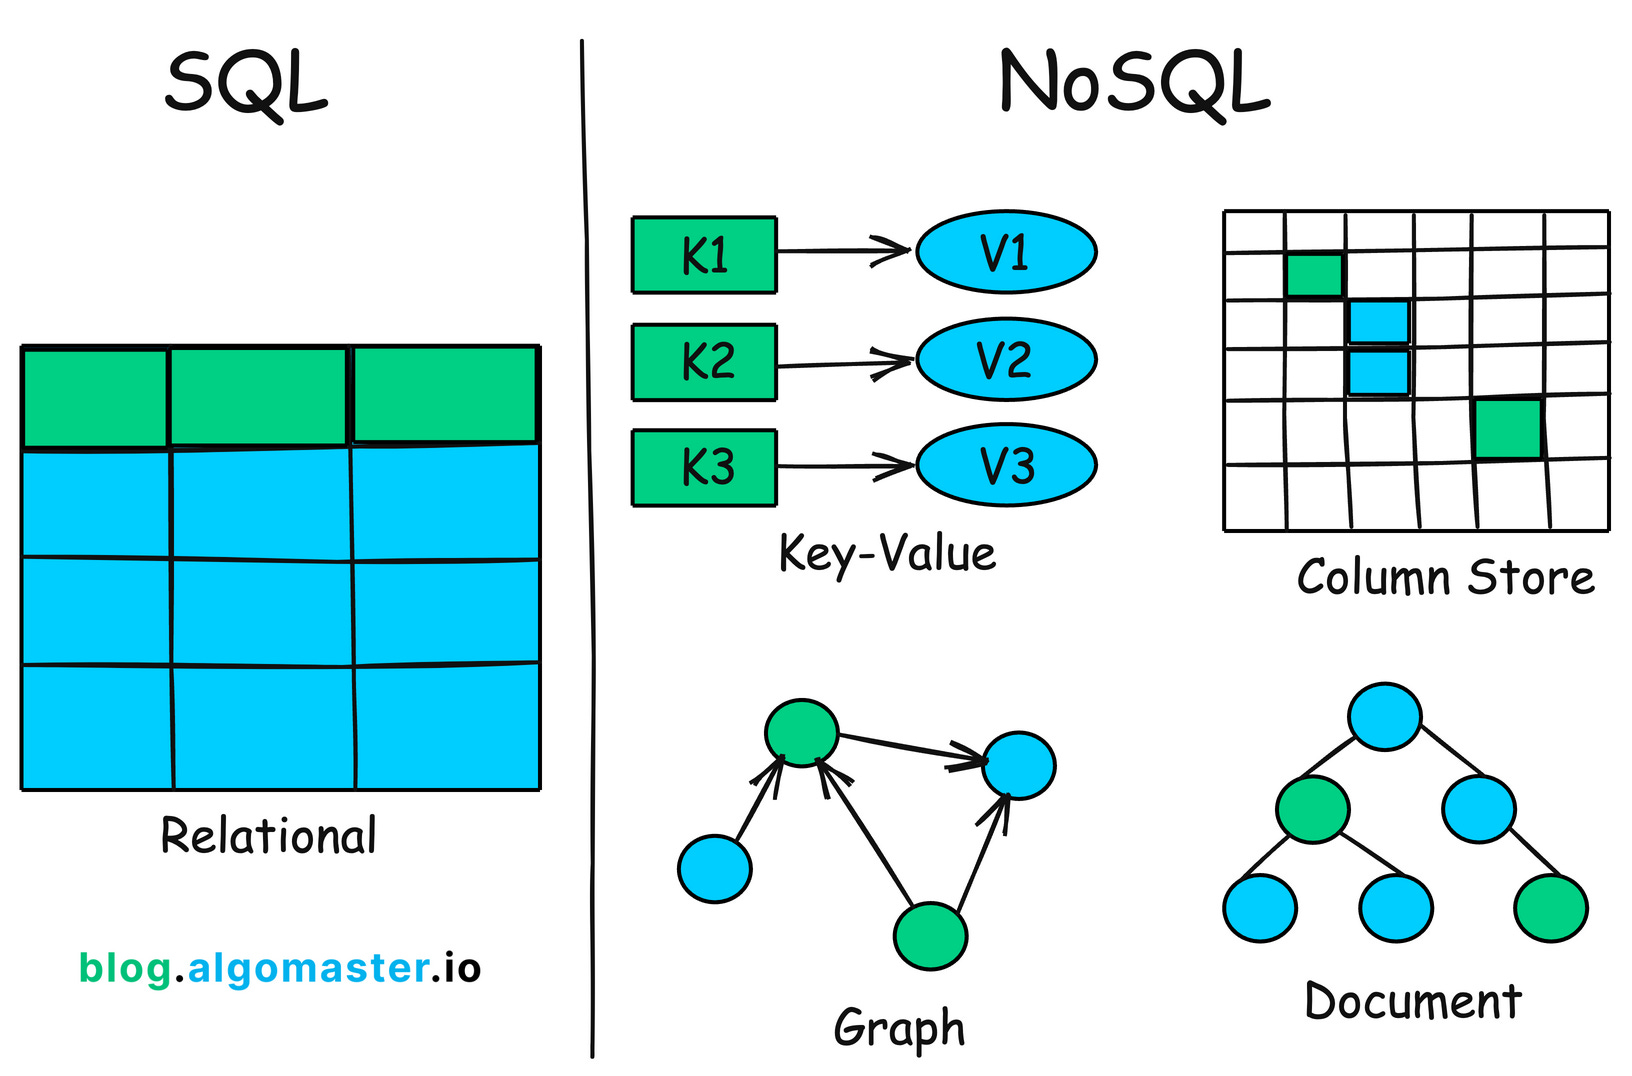

In [16]:
display(Image(filename='Utils/12.jpg'))

**SQL** database stores data in strict predefined schema , and follow the ACID properties.

1. **Atomicity** : A transaction is all or nothing (either it completes or not at all)

2. **Consistency** : Data always remain valid and follow defined rules. (sql uses contrains like primary key)

3. **Isolation** : Transactions does not interfer with one another.

4. **Durability** : Once data is saved , it won't be lost even if system crashes. (sql writes all operations to a transaction log)


That's why SQL databases are ideal for applications that require **strong consistency and structured relationships**, such as banking systems.Examples of popular SQL databases include: MySQL and PostgreSQL.



**NoSQL** databases on the other hand are designed for high scalability and performance.

They don't require **fixed schema** and use different models : 

1. **Key-Value Stores** – Fast lookups for simple key-value pairs (e.g., Redis).
   
   Example : 
    ```
    | Key          | Value                         |
    | ------------ | ----------------------------- |
    | `"user:101"` | `"Akash"`                     |
    | `"user:102"` | `"John"`                      |
    | `"cart:101"` | `["apple", "banana", "milk"]` |

    ```

2. **Document Stores** – Store flexible, JSON-like documents (e.g., MongoDB).

   Example : 

    ```
    {
    "_id": 101,
    "name": "Akash",
    "age": 25,
    "skills": ["Python", "FastAPI"],
    "address": {
        "city": "Delhi",
        "zip": 110001
      }
    }
    ```

3. **Graph Databases** – Best for highly connected data (e.g., Neo4j).

   Example : 

        ```
        Nodes:
        (User: Akash)
        (User: John)
        (Course: System Design)

        Relationships:
        (Akash) -[:FRIEND_WITH]-> (John)
        (Akash) -[:ENROLLED_IN]-> (System Design)
        ```

        ```
        (Akash) --FRIEND_WITH--> (John)
        |
        +--ENROLLED_IN--> (System Design)
        ```

4. **Wide-Column Stores** – Optimized for large-scale, distributed data (e.g., Cassandra).

        Example : Wide-Column Store Example (Cassandra-style)

            | user_id | date       | logins      | clicks      | purchases   |
            | ------- | ---------- | ----------- | ----------- | ----------- |
            | 101     | 2025-10-20 | 3           | 25          | 2           |
            | 101     | 2025-10-21 | 4           | *(missing)* | *(missing)* |
            | 102     | 2025-10-20 | *(missing)* | 12          | *(missing)* |
            | 103     | 2025-10-20 | 5           | 40          | 3           |
        
        Each row stores only the columns it actually has.

        Internally (on disk), Cassandra might store it like this:

        ```
        Partition: user_id = 101
        Column: 2025-10-20:logins     → 3
        Column: 2025-10-20:clicks     → 25
        Column: 2025-10-20:purchases  → 2
        Column: 2025-10-21:logins     → 4

        Partition: user_id = 102
        Column: 2025-10-20:clicks     → 12

        Partition: user_id = 103
        Column: 2025-10-20:logins     → 5
        Column: 2025-10-20:clicks     → 40
        Column: 2025-10-20:purchases  → 3
        ```

            




Question ?? arises which one we should use ??

1. If you need **structured, relational data with strong consistency** → SQL is a better choice.

2. If you need **high scalability, flexible schemas, or fast reads/writes at scale** → NoSQL is a better choice.

3. Many modern applications use both SQL and NoSQL together.
   For example, an e-commerce platform might:
   
   1. Store customer orders in SQL (because they require strict consistency).
   
   2. Store Product recommendations in NoSQL (because they need flexible and fast lookups).

## 12. Vertical Scaling 

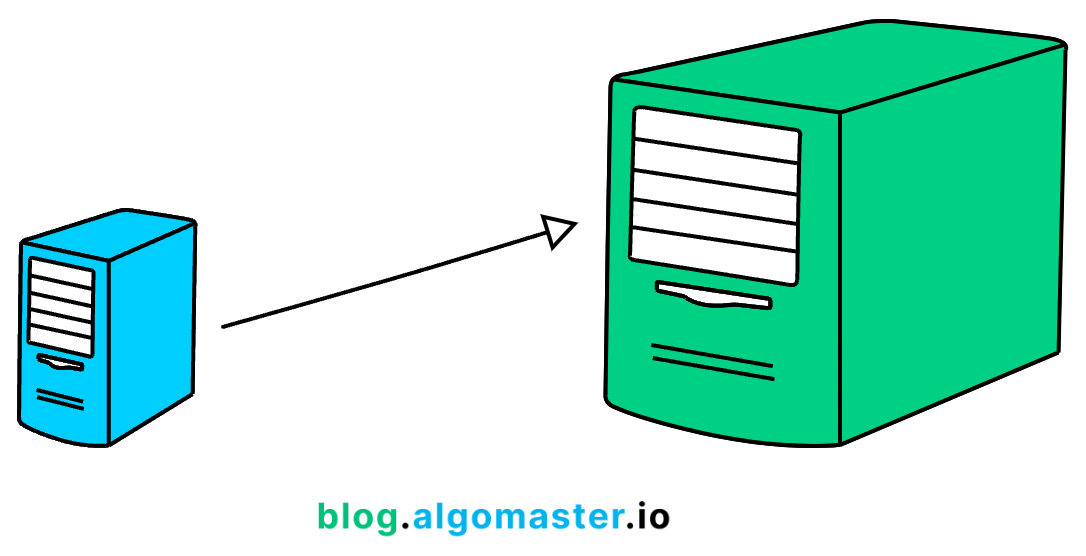

In [19]:
display(Image(filename='Utils/13.png'))

Vertical Scaling (**Scaling Up**)—making a single machine more powerful.

But But... there are some major limitations with this approach:

1. **Hardware limits** → You can’t keep upgrading a server forever. Every machine has a maximum capacity.

   Example : 
   
   1. Each bit in the address bus can represent two states: 0 or 1. 
   
   2. So, if a processor has N address lines, it can uniquely address 2^N  memory locations.
   
   3. Each memory address usually represents 1 byte (8 bits). Hence, total addressable  memory in bytes is 2^N bytes.

    | CPU Type                | Address Width | Formula          | Theoretical Max RAM              | Approx Value         |
    | ----------------------- | ------------- | ---------------- | -------------------------------- | -------------------- |
    | **32-bit CPU**          | 32 bits       | ( 2^{32} ) bytes | 4,294,967,296 bytes              | **4 GB**             |
    | **36-bit (PAE in x86)** | 36 bits       | ( 2^{36} ) bytes | 68,719,476,736 bytes             | **64 GB**            |
    | **64-bit CPU**          | 64 bits       | ( 2^{64} ) bytes | 18,446,744,073,709,551,616 bytes | **16 Exabytes (EB)** |


    i.e 
    
    1. 32-bit → 4 GB max

    2. 64-bit → 16 EB theoretical, much less practical  (no OS or motherboard allows that.)

2. **Cost** → More powerful servers become exponentially more expensive.

3. **Single Point of Failure (SPOF)** → if this one server crashes, the entire system goes down.

While vertical scaling is a quick fix, it’s not a long-term solution for handling high traffic and ensuring system reliability.

There is better approach , that makes our system more **scalable and fault tolerant**.

## 13. Horizontal Scaling 

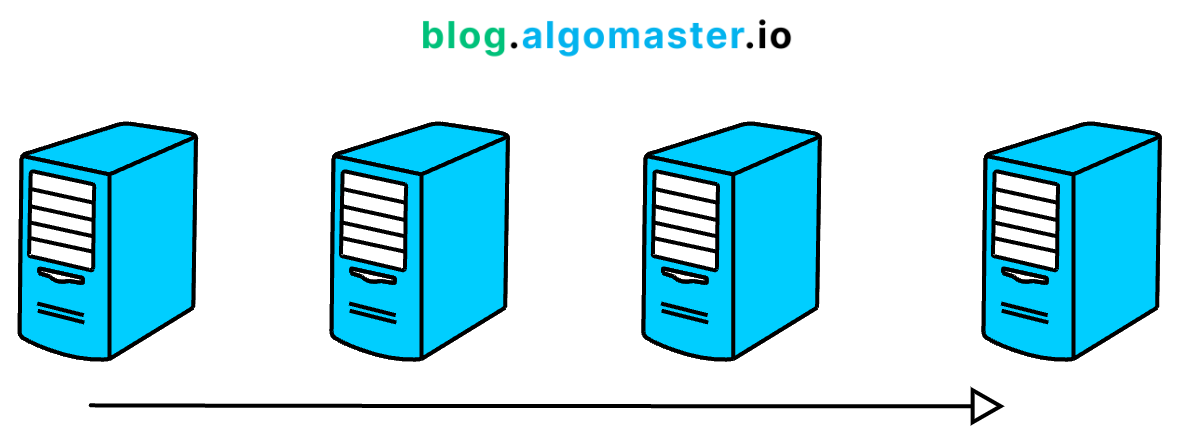

In [20]:
display(Image(filename='Utils/14.png'))

Horizontal Scaling (**Scaling Out**) , where we distribute the workload across multiple machines.

This approach is better because:

1. **More servers** = More capacity → The system can handle increasing traffic more effectively.

2. **No Single Point of Failure** → If one server goes down, others can take over, improving **reliability**.

3. **Cost-effective** → Instead of investing in a single, super-expensive machine, we can use multiple affordable ones.


But But it comes with a new challenge !!!

**How do client know which server to connect to ??..**

## 14. Load Balancers

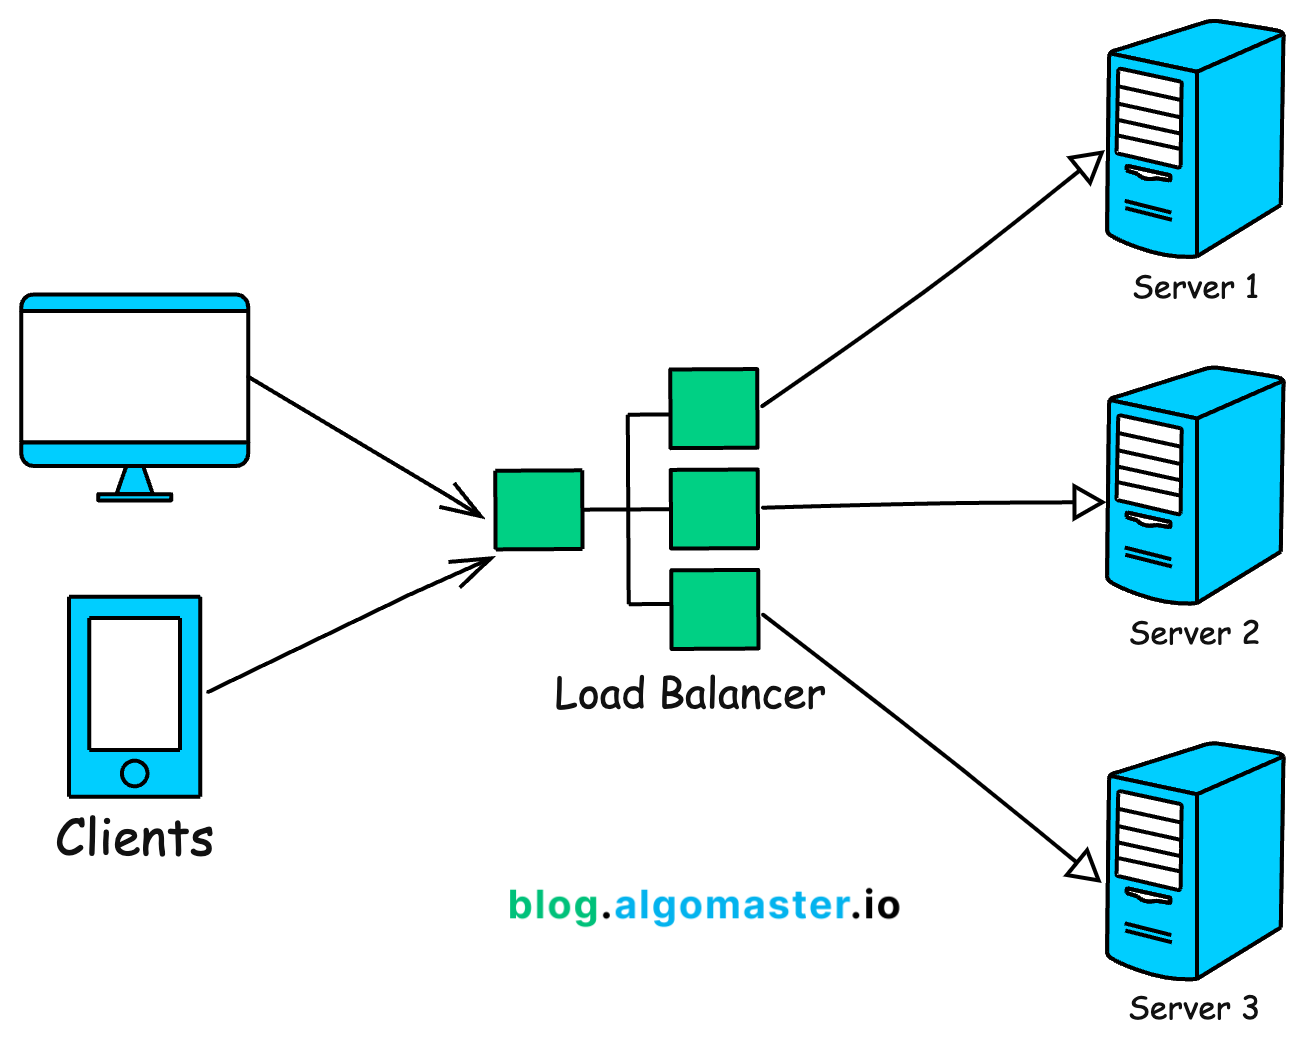

In [21]:
display(Image(filename='Utils/15.png'))